In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import math

# Esercizio 0

$X_i$ segue un modello bernoulliano e quindi $p_X(x)=p$ se $x$ vale $1$ altrimenti $1-p$

E1 = "piove in almeno un giorno infrasettimanale"

$X \sim B(5,p)$

$P(E1)=1-p_X(0)=1-(1-p)^5$

E2 = "non piove nel fine settimana"

$X \sim B(2,p) $ ora valuto una nuova v.a con solo due elementi dal momento che voglio calcolare la probabilita che non piova in due giorni. 

$P(E2)=p_X(0)=(1-p)^2$

Gli eventi sono indipendenti e non mutualmente esclusivi

Se consideriamo $p=0.4$ possiamo ottenere che

$P(E1) = 1-(0.6)^5 = 0.922$

$P(E2) = 1-(0.6)^2 = 0.36$

$P(E3) = P(E1) \cdot P(E2) = 0.33$

$P(E4) = P(E1) + P(E2) - P(E3)= 0.952$

In [7]:
0.922+0.36 - 0.33

0.952

# ESERCIZIO 2

In [28]:
df=pd.read_csv('DATI-AMBIENTE.txt', sep=';')
df

,PROVINCIA,C6H6,SO2,CO,NO2,O3,O3_GIORNI_SUPERAMENTO_TOLLERANZA,O3_GIORNI_SUPERAMENTO_ALLARME,PM10,PM2_5,Pb,As,Ni,Cd,BaP
0,BG,1.0,3.0,0.5,30.0,55.0,16.0,1.0,30.0,21.0,NaN,NaN,NaN,NaN,NaN
1,BG,NaN,NaN,NaN,24.0,42.0,4.0,0.0,37.0,29.0,0.014,1.5,4.0,0.2,0.5
2,BG,NaN,NaN,NaN,25.0,55.0,23.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BG,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BG,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,VA,1.3,NaN,NaN,34.0,37.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,VA,NaN,3.0,0.4,27.0,47.0,19.0,0.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN
147,VA,NaN,NaN,NaN,38.0,46.0,22.0,1.0,30.0,22.0,NaN,NaN,NaN,NaN,NaN
148,VA,NaN,NaN,NaN,44.0,43.0,12.0,0.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
print(df['C6H6'].mean())
print(df['C6H6'].median())
print(df['C6H6'].std())
print(df['C6H6'].quantile(.75)-df['C6H6'].quantile(.25))

1.32962962962963
1.1
0.7425604429243531
0.85


In [33]:
print(df['SO2'].mean())
print(df['SO2'].median())
print(df['SO2'].std())
print(df['SO2'].quantile(.75)-df['SO2'].quantile(.25))

3.581578947368421
3.15
1.7356134927746918
3.0


In [35]:
print(df['CO'].mean())
print(df['CO'].median())
print(df['CO'].std())
print(df['CO'].quantile(.75)-df['CO'].quantile(.25))

0.6912280701754385
0.6
0.2362510028356539
0.30000000000000004


In [36]:
len(df)

150

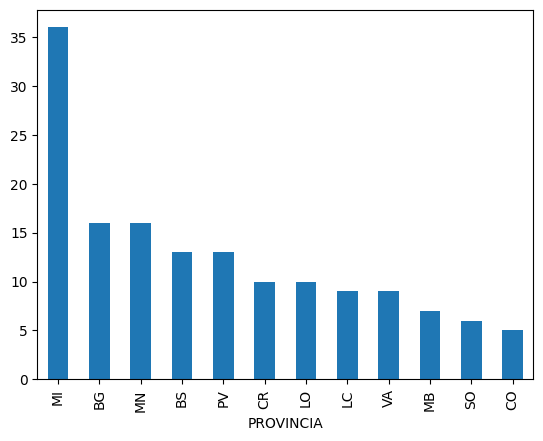

In [40]:
df['PROVINCIA'].value_counts().plot.bar()
plt.show()

in lombardia sono 150

Meno rappresentata: CO

Piu rappresentata: MI

In [43]:
def gini(series):
    s=len(series)
    return s*(1-sum(series.value_counts(normalize=True).map(lambda f: f**2)))/(s-1)

In [44]:
gini(df['PROVINCIA'])

0.8895749440715884

In [46]:
inquinanti=df[['C6H6','CO','SO2']]

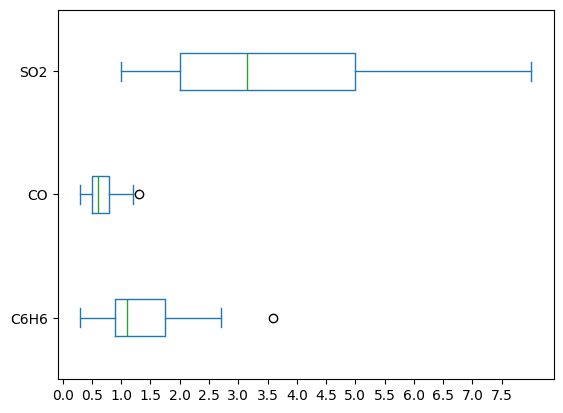

In [57]:
x=np.arange(0,8,.50)
inquinanti.plot.box(vert=False)
plt.xticks(x)
plt.show()

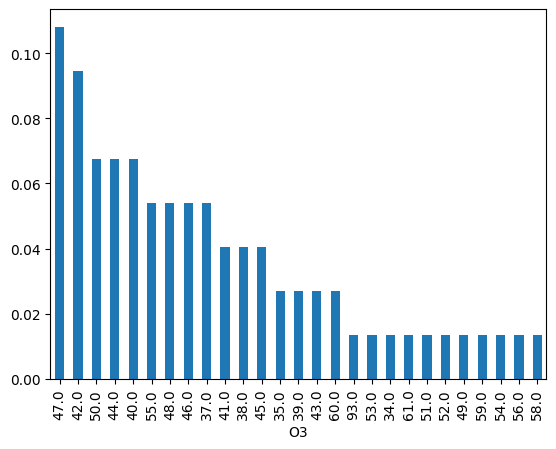

In [61]:
ozono=df['O3']
ozono.value_counts(normalize=True).plot.bar()
plt.show()

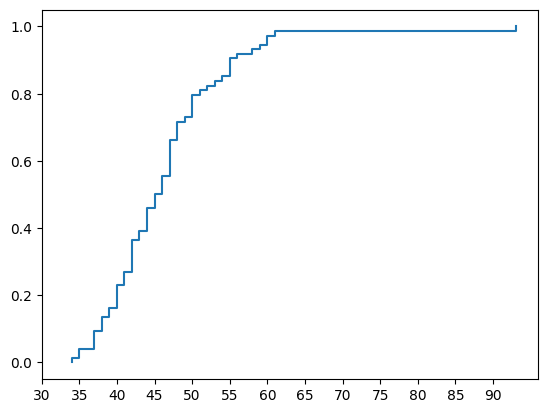

In [75]:
x=np.arange(30,95,5)
dist=sm.distributions.ECDF(ozono.dropna())
plt.step(dist.x,dist.y,where='post')
plt.xticks(x)
plt.show()

In [80]:
centraline_s1=df[df['O3']==46]
len(centraline_s1)

4

In [81]:
centraline_s2=df[(df['O3']>=45) & (df['O3']<=50)]
centraline_s2.describe()
len(centraline_s2)

25

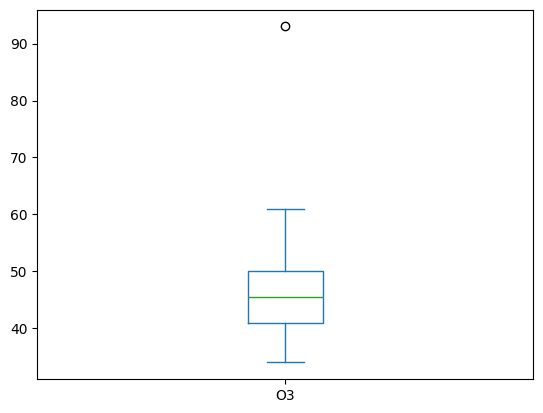

In [98]:
ozono=df['O3']
ozono.plot.box()
plt.show()

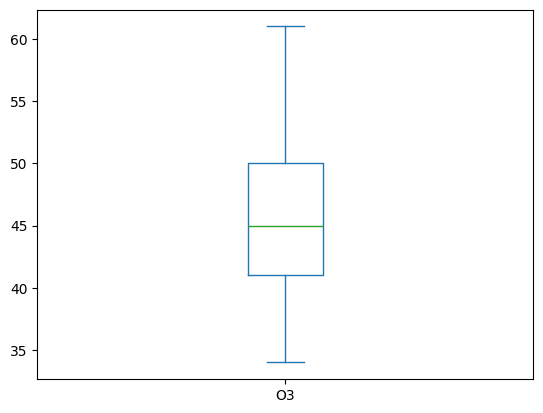

In [102]:
df[df['O3']<90]['O3'].plot.box()
plt.show()

In [103]:
ozono=df['O3_GIORNI_SUPERAMENTO_TOLLERANZA']
ozono.mean()

11.207792207792208

In [104]:
ozono.std()

8.02518676998214